# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
from scipy.stats import shapiro, kstest, jarque_bera, normaltest, chisquare, boxcox, yeojohnson
import sklearn
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')


# 2. Importing Dataset

In [2]:
# Importing data:
data = pd.read_csv('../Datasets/raw_datasets/data.csv', index_col='id')
submission  = pd.read_csv('../Datasets/raw_datasets/sample_submission.csv')

# Making a deep copy of the data
data_copy = data.copy(deep = True)

# 3. Exploratory Data Analysis (EDA):

## 3.1 Meet and Greet with the Data (Preliminary Data Exploration):

In [3]:
# Printing the first few entries of datasets.
print("Dataset Sample: \n\n")
display(data_copy.head())
print("\n\n Submission Dataset Sample: \n\n")
display(submission.head())

Dataset Sample: 




,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263




 Submission Dataset Sample: 




,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [4]:
# A brief overview of data
print("\n\n A brief overview of Training Dataset:\n")
print(data_copy.info())



 A brief overview of Training Dataset:

<class 'pandas.core.frame.DataFrame'>
Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21

In [5]:
# A Brief Statistical Overview:
display("\n\n A brief statistical overview of Training Dataset:\n\n", data_copy.describe(include='all').T)

'\n\n A brief statistical overview of Training Dataset:\n\n'

,count,mean,std,min,25%,50%,75%,max
f_00,98000.0,0.001220,1.002801,-4.732235,-0.675226,0.002022,0.677271,4.490521
f_01,98000.0,0.005580,1.000742,-4.202795,-0.670985,0.006650,0.677746,4.324974
f_02,98000.0,-0.001042,1.001373,-4.377021,-0.672779,-0.000324,0.677086,4.560247
f_03,98000.0,-0.000700,1.000422,-4.010826,-0.672540,-0.003185,0.672097,4.399373
f_04,98000.0,-0.003522,1.003061,-4.535903,-0.682510,-0.003307,0.677589,4.050549
f_05,98000.0,-0.001612,1.000532,-4.300767,-0.675066,0.001024,0.673344,4.710316
f_06,98000.0,-0.003042,0.997434,-4.894525,-0.680421,-0.002053,0.668112,3.998595
f_07,98000.0,5.545918,3.691840,0.000000,3.000000,5.000000,8.000000,32.000000
f_08,98000.0,6.763061,4.152348,0.000000,4.000000,6.000000,9.000000,30.000000
f_09,98000.0,8.193163,5.904919,0.000000,4.000000,7.000000,11.000000,44.000000


In [6]:
# Finding Duplicates
print(f"Duplicates in training dataset: {data_copy.duplicated().sum()}, ({np.round(100*data_copy.duplicated().sum()/len(data_copy),1)}%)")

Duplicates in training dataset: 0, (0.0%)


In [7]:
# Finding Missing Values
print("missing/null values across columns:\n")

print(data_copy.isna().sum())

missing/null values across columns:

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64


## 3.2 Discrete features (Integer Columns) Distribution Analysis:


Interger Columns (Number of Unique Categories)

  Features  Unique
0     f_07      32
1     f_08      29
2     f_09      45
3     f_10      37
4     f_11      29
5     f_12      39
6     f_13      30


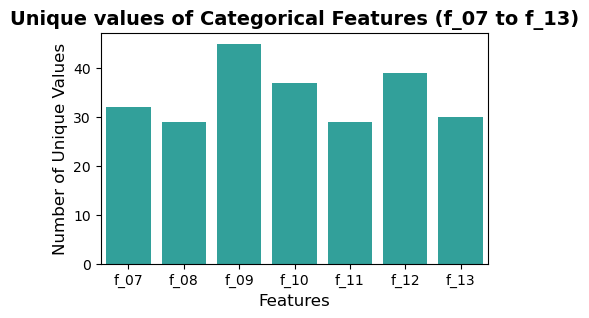

In [8]:
# integer data
int_data = data_copy.select_dtypes(int)

# interger data column names as a list
int_data_cols = int_data.columns.to_list()

# Number of Unique Interger Columns Categories:
int_cols_nunique = int_data.nunique().reset_index()
int_cols_nunique.columns = ['Features', 'Unique']

print("\nInterger Columns (Number of Unique Categories)\n")
print(int_cols_nunique)

plt.figure(figsize=(5,3))
sns.barplot(x='Features', y='Unique', data=int_cols_nunique, color='lightseagreen')
plt.title('Unique values of Categorical Features (f_07 to f_13)', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.xticks()
plt.show()



Integer Columns (Unique Categories and their Value Counts Distribution)

f_07: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 32]
f_08: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 30]
f_09: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
f_10: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
f_11: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
f_12: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
f_13: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 30]


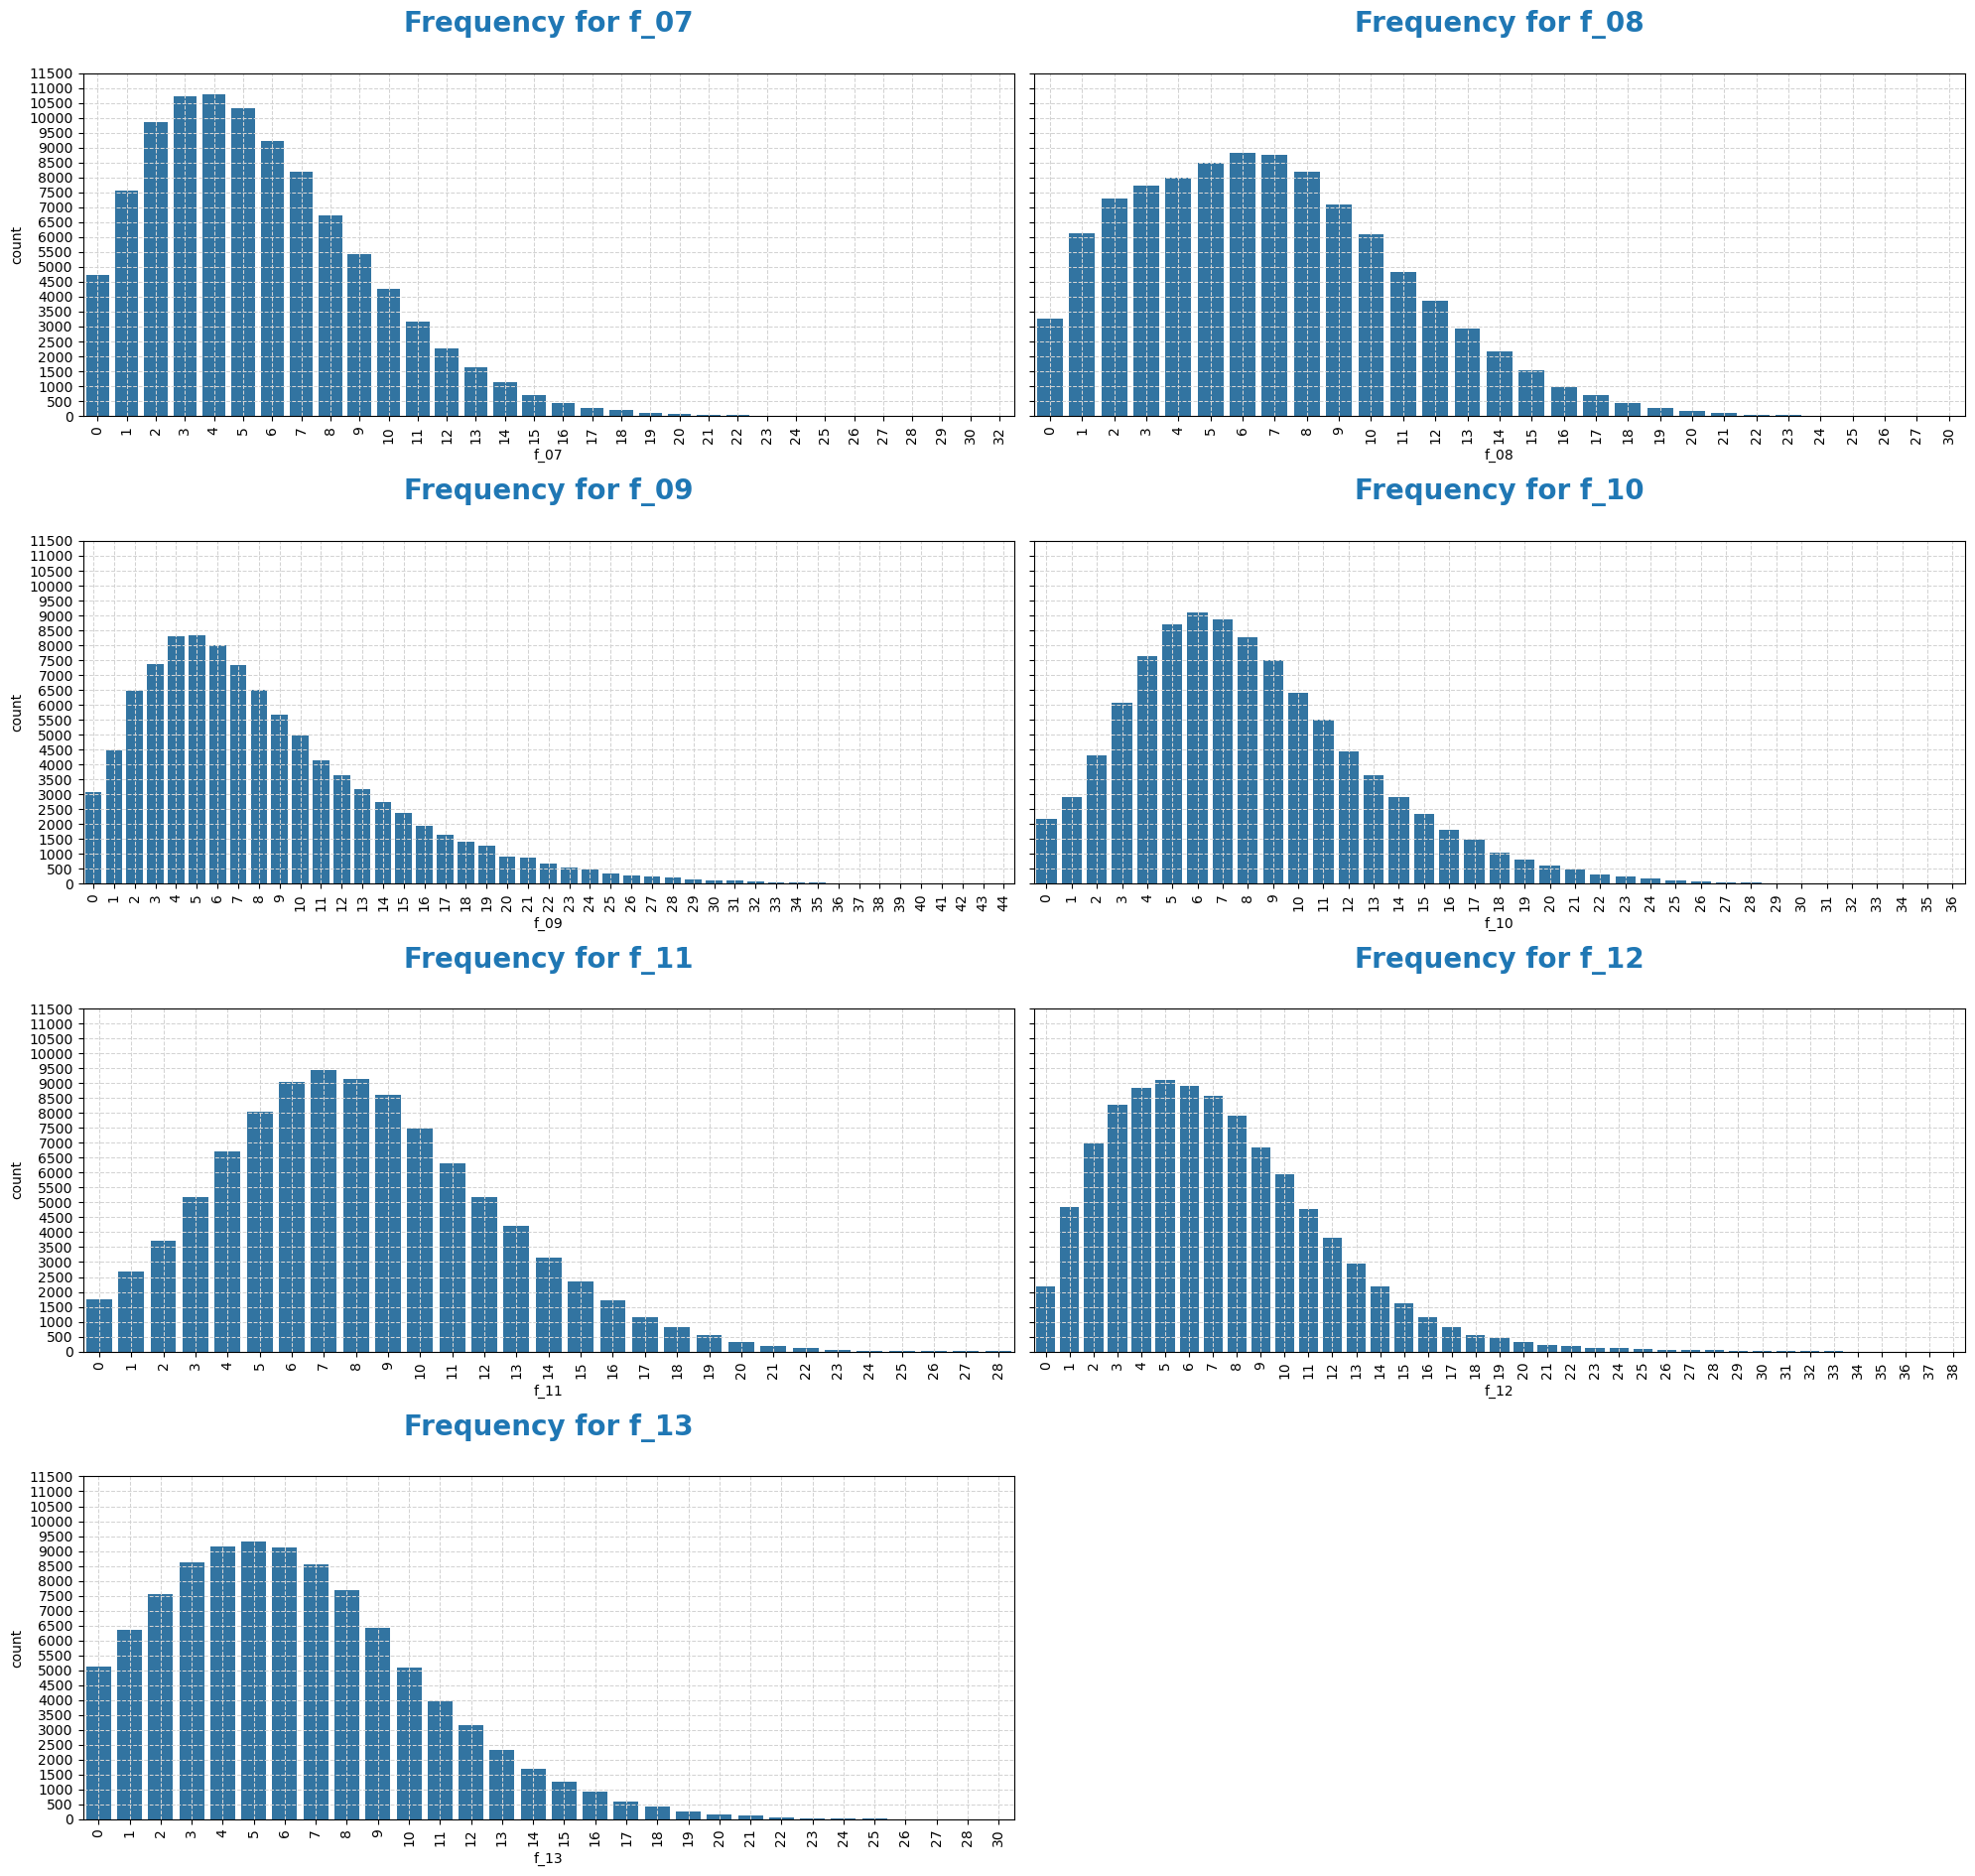

In [9]:
print("\nInteger Columns (Unique Categories and their Value Counts Distribution)\n")

ncols = 2
nrows = int(np.ceil(len(int_data_cols) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(20,19), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

# Iterate over each integer column and print the number of unique values
for i, col in enumerate(int_data_cols):
    unique_values = np.sort(int_data[col].unique())
    print(f"{col}: {unique_values}")

    # Plotting with Seaborn
    sns.countplot(x=col, data=int_data, color='tab:blue', order=unique_values, ax=ax[i])
    ax[i].set_title(f"Frequency for {col}\n", fontsize=20, fontweight='bold', color='tab:blue')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
    ax[i].set_yticks(range(0, 12000, 500))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

# Remove any unused subplots if the number of integer columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()

## 3.3 Continuous features (Float Columns) Distribution Analysis:

In [10]:
# float data
float_data = data_copy.select_dtypes(float)
display(float_data.head())

# float data column names as a list
float_data_cols = float_data.columns.to_list()
display(float_data_cols)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_14,f_15,f_16,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,-0.469819,0.358126,1.068105,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,0.591035,-0.396915,0.145834,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,-0.679875,0.469326,0.349843,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,-0.389456,0.626762,-1.074543,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,-0.120743,-0.615578,-1.064359,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21',
 'f_22',
 'f_23',
 'f_24',
 'f_25',
 'f_26',
 'f_27',
 'f_28']


Float Columns (Continuous Feature Distribution)



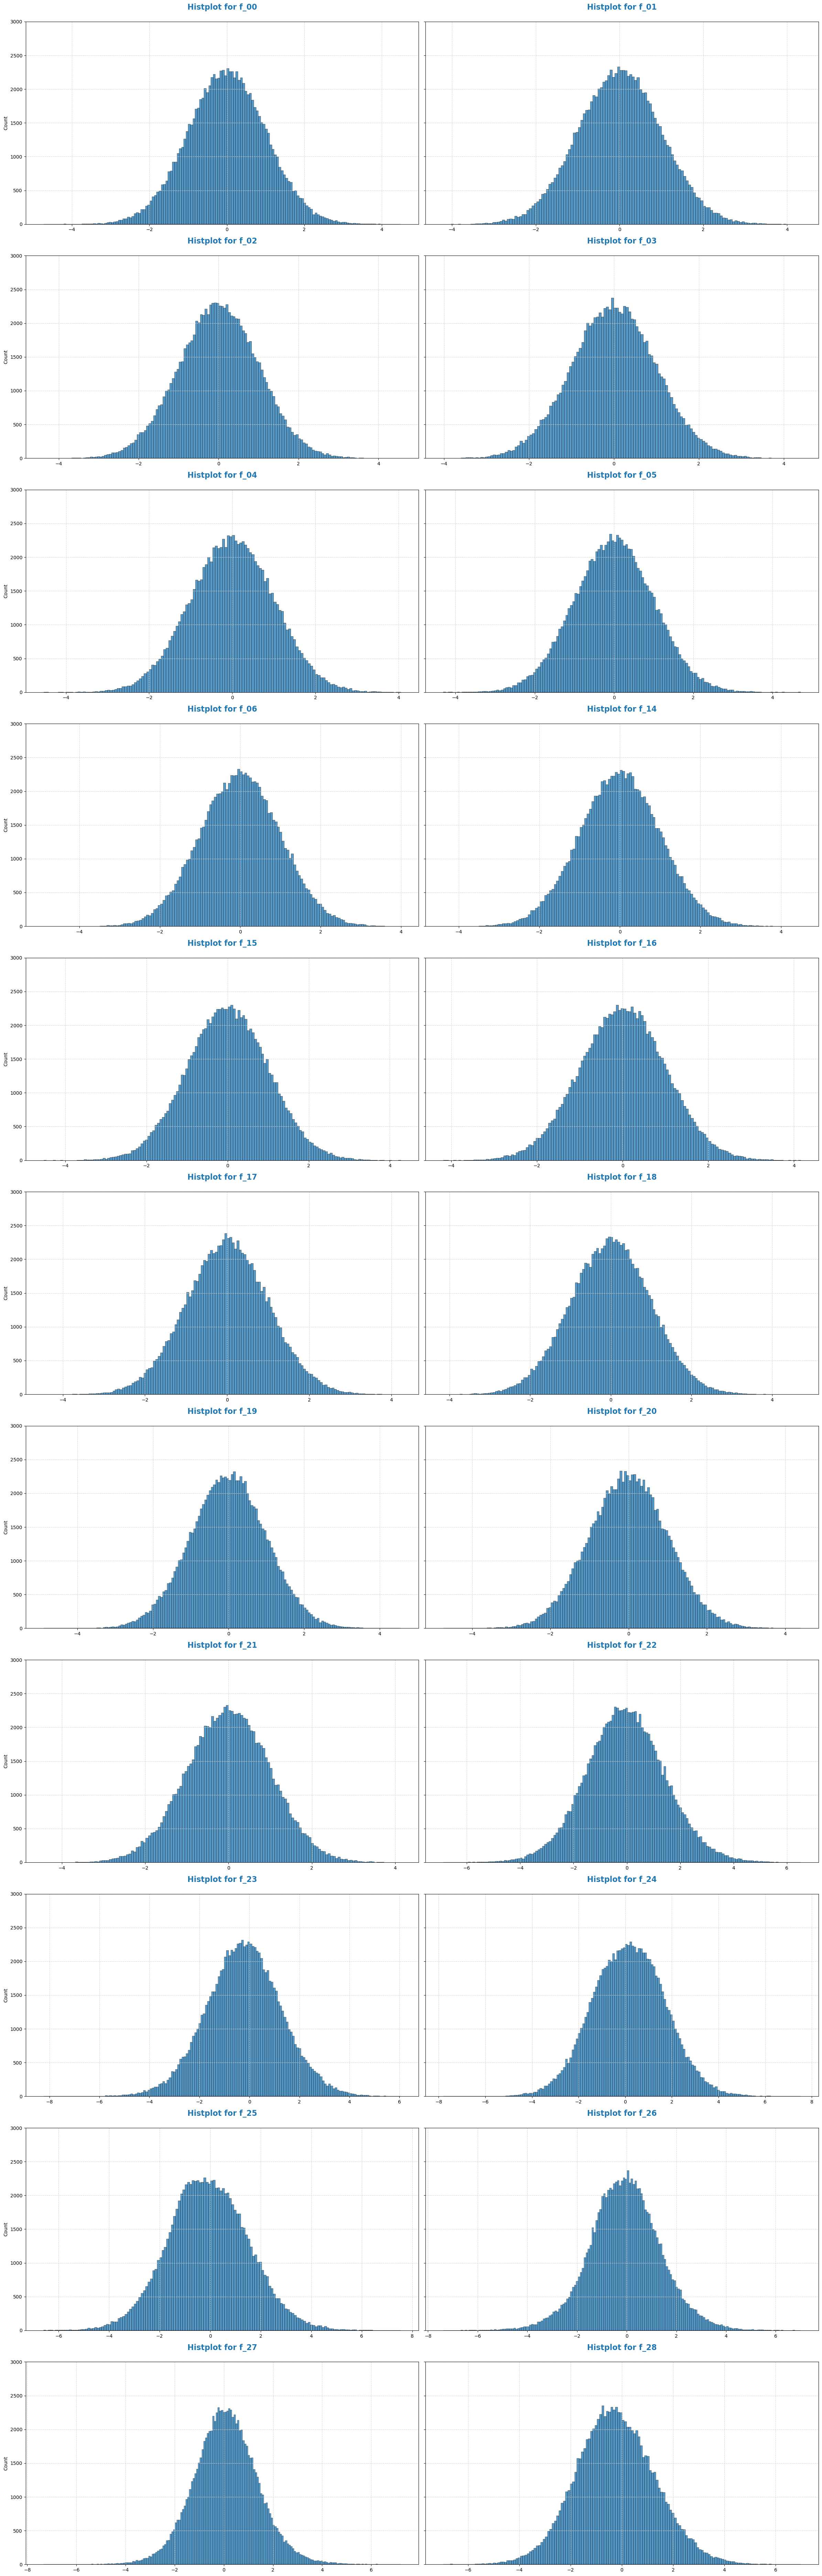

In [11]:
print("\nFloat Columns (Continuous Feature Distribution)\n")

ncols = 2
nrows = int(np.ceil(len(float_data_cols) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(24, 75), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

for i, col in enumerate(float_data_cols):

    # Plotting with Seaborn
    sns.histplot(data=float_data, x=col, color='tab:blue', ax=ax[i])
    ax[i].set_title(f"Histplot for {col}\n", fontsize=16, fontweight='bold', color='tab:blue')
    ax[i].set(xlabel='')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)
    ax[i].set_yticks(range(0, 3001, 500))

# Remove any unused subplots if the number of float columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
plt.show()

## 3.4 KDE Plots (To Better Visualize All Features Distributions):


KDE Plots for All Features



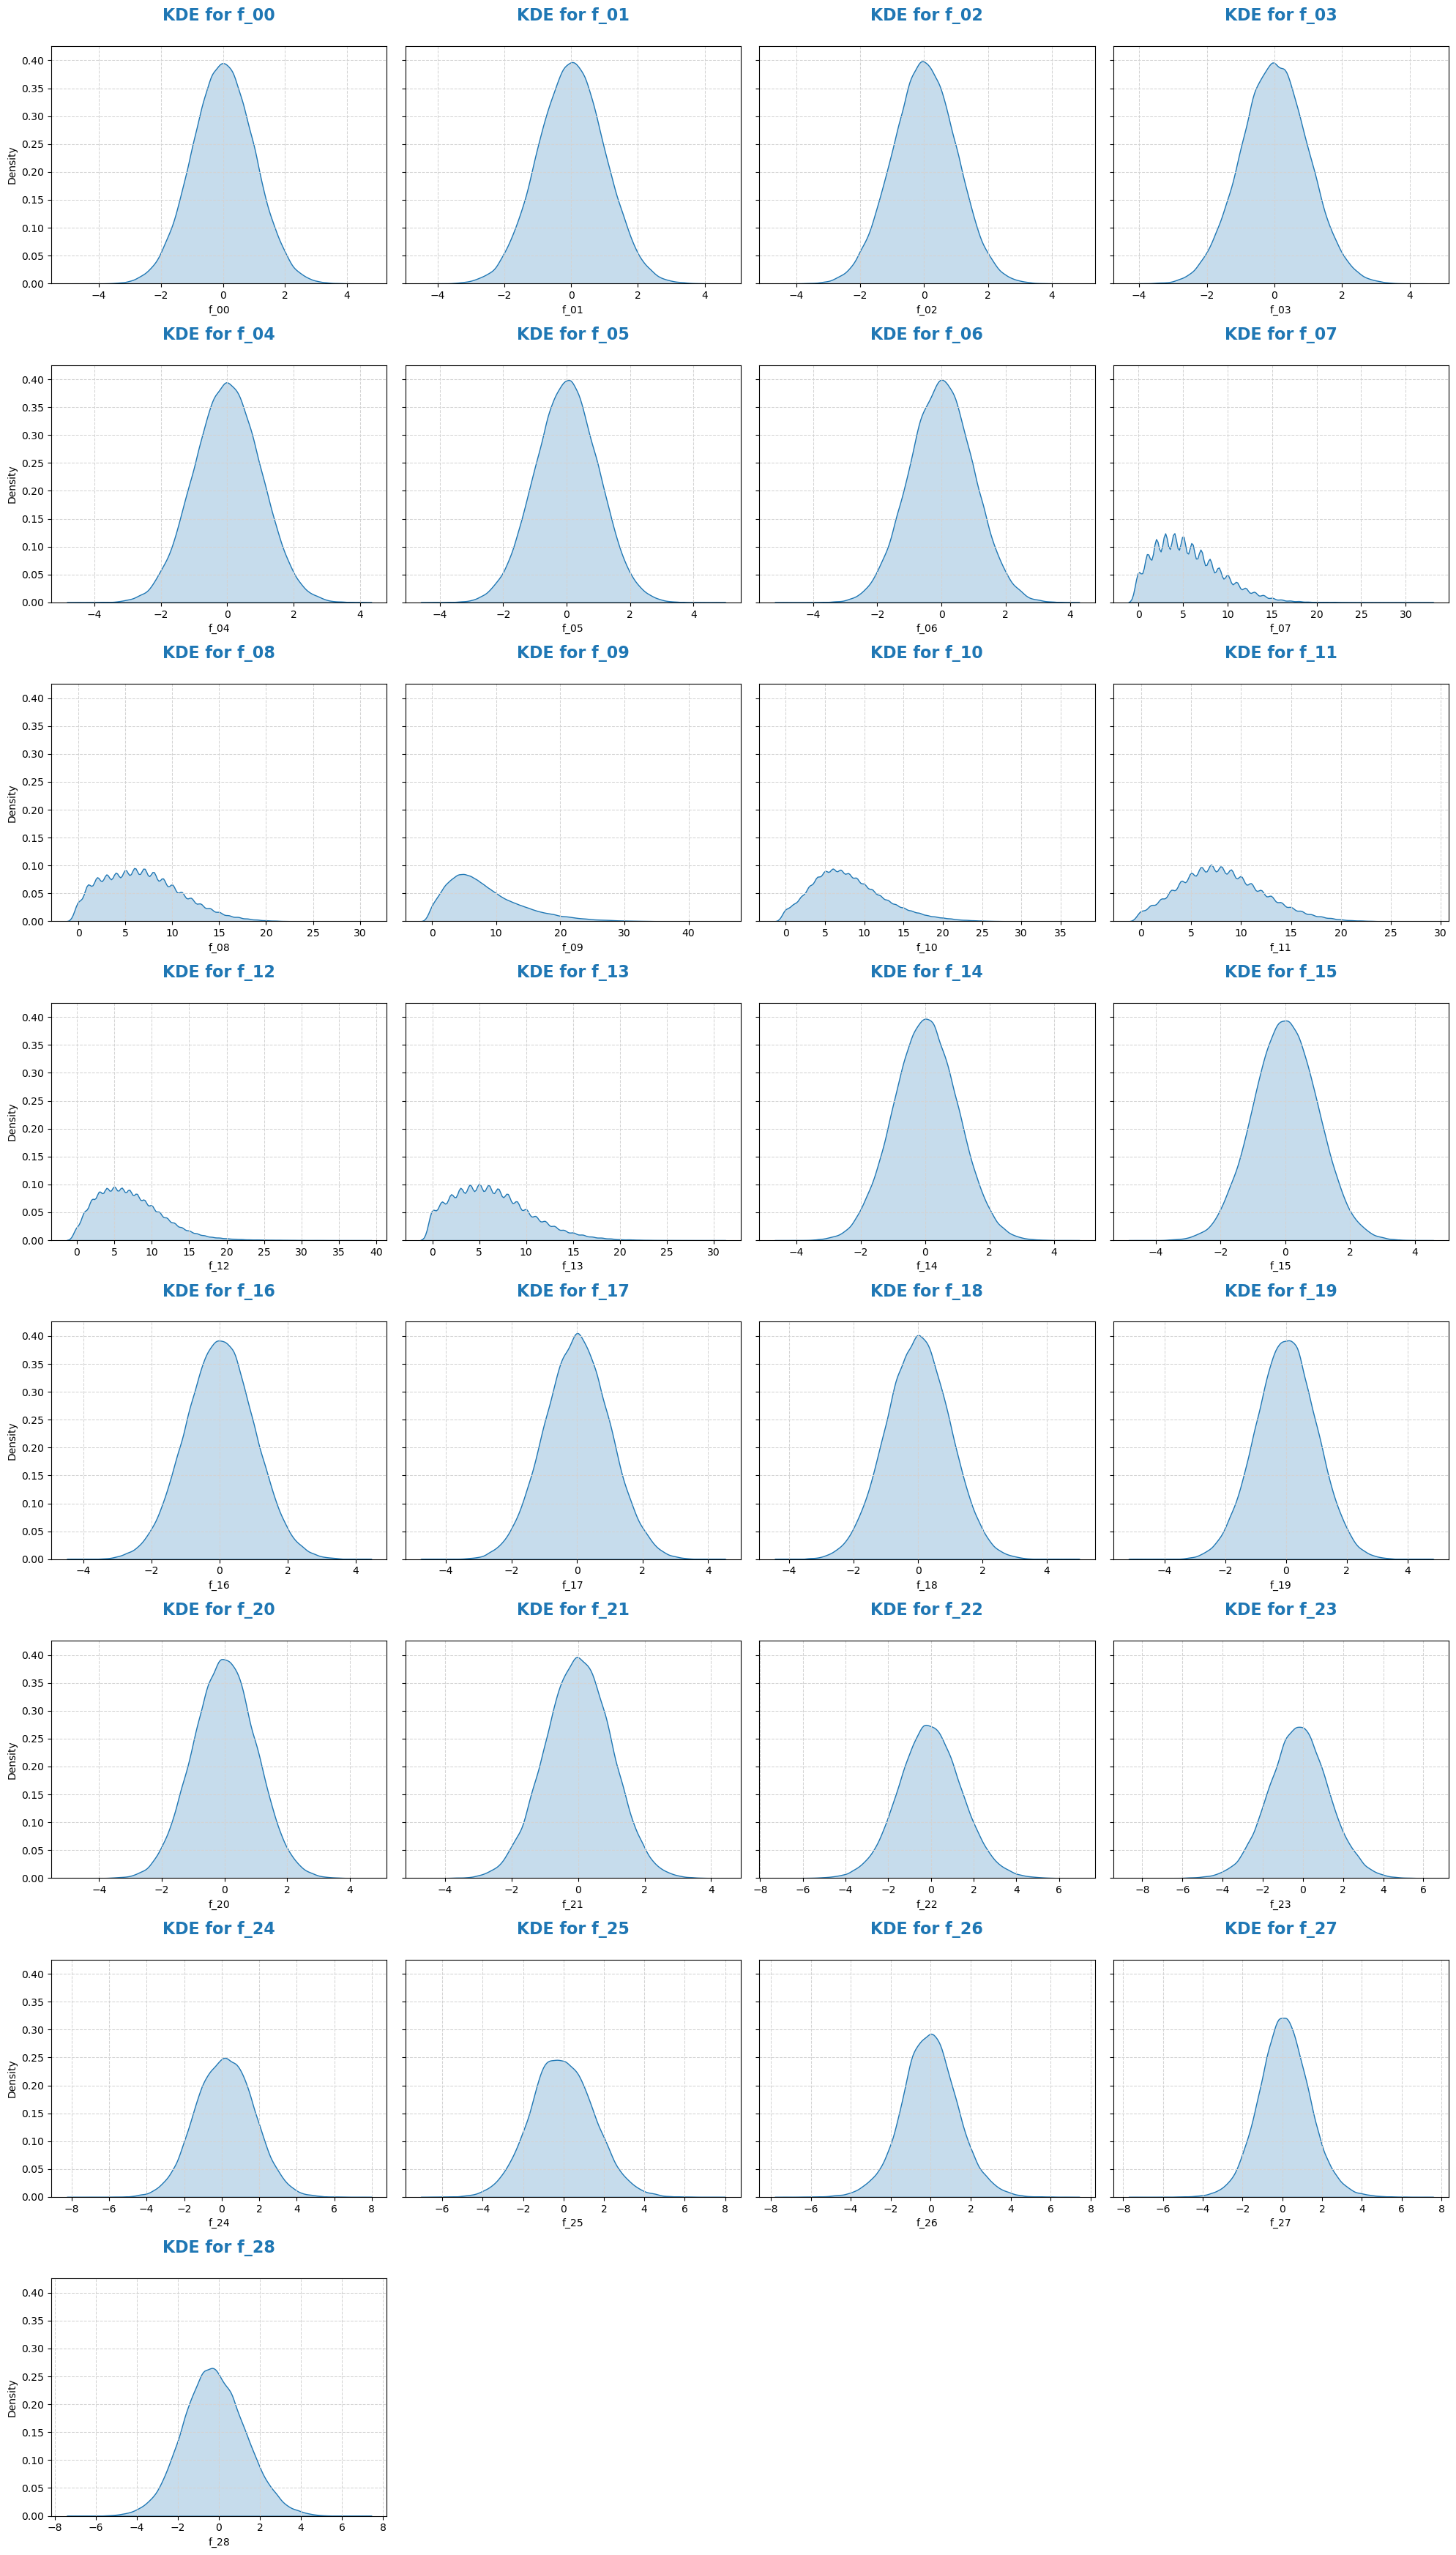

In [12]:
# Plot KDE for all features
print("\nKDE Plots for All Features\n")

# data_copy column names as a list
data_copy_cols_list = data_copy.columns.to_list()

# Determine the number of columns and rows for subplot grid
ncols = 4
nrows = int(np.ceil(len(data_copy_cols_list) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 35), sharey=True)

# Flattening the axes array for easy indexing
ax = ax.flatten()

for i, col in enumerate(data_copy_cols_list):
    # Plotting KDE with Seaborn
    sns.kdeplot(data=data_copy, x=col, color='tab:blue', fill=True, ax=ax[i])
    ax[i].set_title(f"KDE for {col}\n", fontsize=16, fontweight='bold', color='tab:blue')
    ax[i].grid(visible=True, which='both', color='lightgrey', linestyle='--', linewidth=0.75)

# Remove any unused subplots if the number of columns is less than the grid size
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

fig.tight_layout()
plt.show()

## 3.5 Correlation Analysis:

In pandas, the .corr() method computes pairwise correlation of columns by following methods:

- **pearson** (default method): standard correlation coefficient. It computes the linear correlation between two variables.
- **spearman** : Spearman rank correlation. It's often used when dealing with small sample sizes.
- **kendall** : Kendall Tau correlation coefficient. It's useful when data is ordinal or not normally distributed.


Correlation Analysis without Transforms



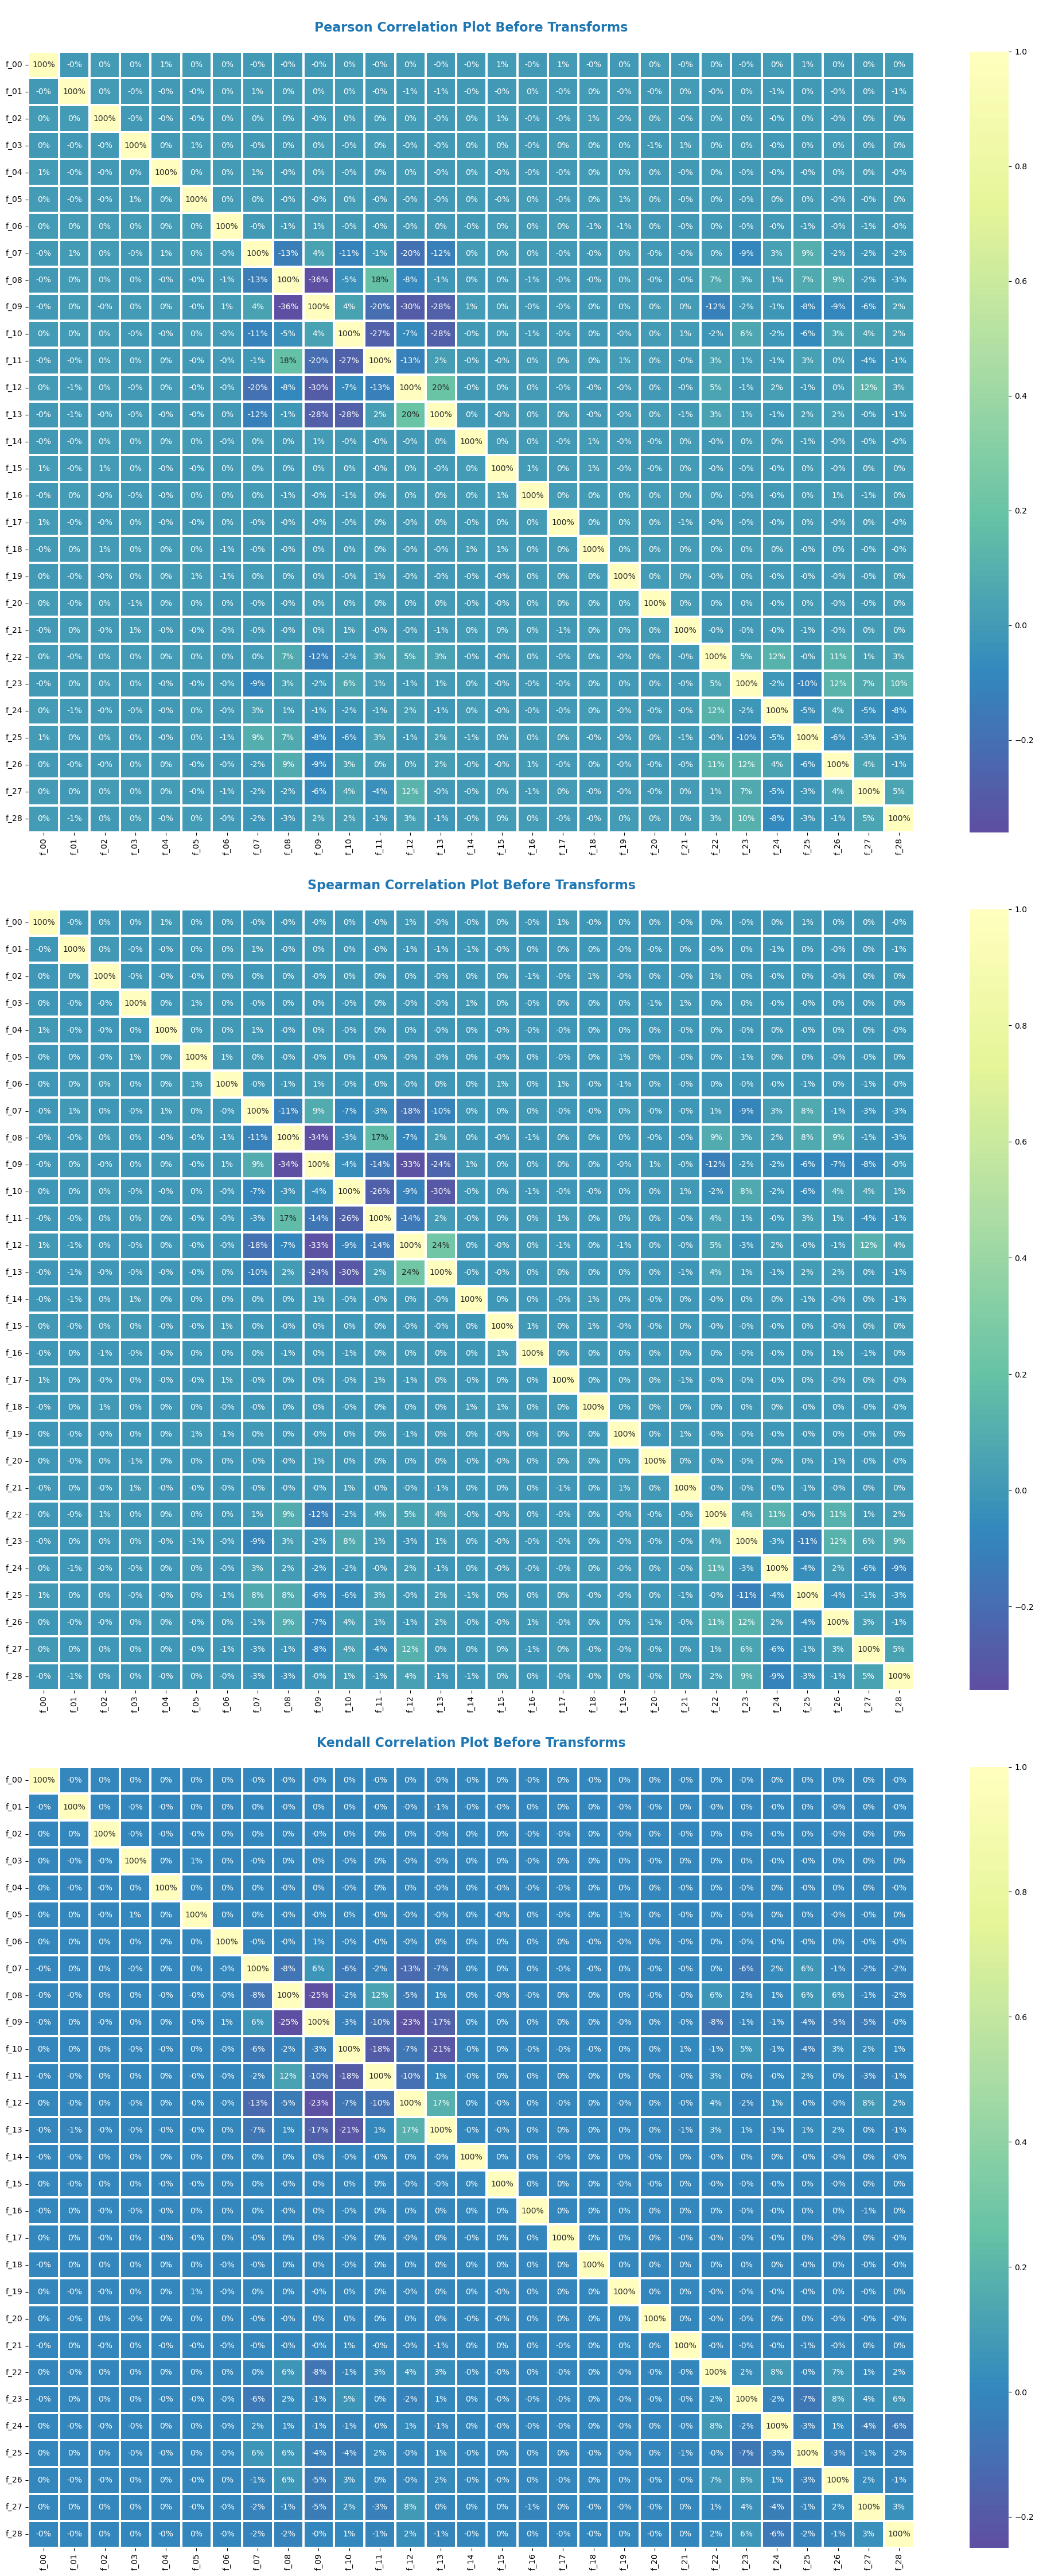

In [13]:
print("\nCorrelation Analysis without Transforms\n")

correlation_methods = ['pearson', 'spearman', 'kendall']
ncols = 1
nrows = len(correlation_methods)

fig, ax = plt.subplots(nrows, ncols, figsize=(20, 15 * nrows))

# Flattening the axes array for easy indexing
ax = ax.flatten() if nrows > 1 else [ax]

for i, method in enumerate(correlation_methods):
    correlation_value = data_copy.corr(method=method)
    
    # Plotting the heatmap with Seaborn
    sns.heatmap(correlation_value, annot=True, fmt='.0%', linewidth=1.5, center=True, cmap='Spectral_r', linecolor='white', ax=ax[i])
    
    ax[i].set_title(f"\n{method.capitalize()} Correlation Plot Before Transforms\n", 
                    color='tab:blue', fontsize=16, fontweight='bold')
    ax[i].set_yticks(ax[i].get_yticks())
    ax[i].set_xticks(ax[i].get_xticks())
    ax[i].tick_params(axis='y', labelrotation=0)
    ax[i].tick_params(axis='x', labelrotation=90)
    
plt.tight_layout()
plt.show()

## 3.6 Insights and Hypotheses from Preliminary Data Exploration:

### 3.6.1 Insights:

**Initial Data Exploration shows that:**<br> <br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Discreate features:**
- There are 7 discrete features (f_07 to f_13)
- All discreate features exhibits non-negative values.<br>

    **Continuous Features:**
- There are 22 continuous features (f_00 to f_06 and f_14 to f_28)<br><br>
- Features f_00 to f_06 and f_14 to f_21 are characterized by values typically lying between -5 and +5
- For features f_00 to f_06 and f_14 to f_21, the mean values are around 0 and the standard deviation values are around 1 <br> <br>
- Features f_22 to f_28 exhibit values typically ranging between -8 and +8
- For features f_22 to f_28, the mean values are around 0 and the standard deviation values are around 1.5

**Initial Data Exploration along with KDE plots and Discrete Features Distribution Analysis shows that:**

- The distributions of these discrete features (f_07 to f_13) appear similar.
- Possibly these distributions follow a **Poisson distribution** due to their **Discrete Nature** and **Right Skewness**.

**Initial Data Exploration along with KDE plots and Continuous Features Distribution Analysis shows that:**

- The distributions of these continuous features (f_00 to f_06 and f_14 to f_28) appear similar.<br>
Specifically,
- The distribution of features f_00 to f_06 and f_14 to f_21 appear to be approximately **Gaussian(Normal) distribution**, with **mean values around 0** and **standard deviation values around 1**
- The distribution of features f_22 to f_28 also appear to be approximately **Gaussian(Normal) distribution**, but with **mean values around 0** and **standard deviation values around 1.5**

**Correlation Analysis:**

- The majority of columns display weak correlations, although some, especially those containing integer values, demonstrate moderate correlations.
    - Continuous Features f_00 to f_06 and f_14 to f_21 are independent of the other features.
    - Continuous Features f_22 to f_28 show very weak correlation and very weak dependency on eachother
    - Discrete Features f_07 to f_13 exhibit moderate correlations and demonstrate a slightly stronger dependency on each other as compared to the previously described features.
- This issue could potentially be addressed through feature transformations.

### 3.6.2 Hypothesis:

- Continuous Features (f_00 to f_06 and f_14 to f_28) follows Normal Distribution
- Discrete Features (f_07 to f_13) follows Poisson Distribution

### 3.6.3 Plan for Further Analysis:

Based on the Insights and Hypotheses derived from the Preliminary Data Exploration, the following plan is devised for further analysis:

- **Hypothesis Testing**

    - Validate formulated hypotheses regarding the distribution types of discrete and continuous features through hypothesis testing.
    - Utilize appropriate statistical tests such as chi-square test for Poisson distribution and Shapiro-Wilk test for Normal distribution.
    - Results from hypothesis testing will provide statistical evidence to support or refute initial assumptions about feature distributions.

## 3.7 Hypothesis Testing:

### 3.7.1 Hypothesis Formulation:

Before conducting hypothesis testing, it's crucial to clearly state the hypotheses being tested:

- Null Hypotheses (H0):
    - H01: Continuous Features (f_00 to f_06 and f_14 to f_28) follow Normal Distribution.
    - H02: Discrete Features (f_07 to f_13) follow Poisson Distribution.
- Alternative Hypotheses (H1):
    - H11: Continuous Features (f_00 to f_06 and f_14 to f_28) do not follow Normal Distribution.
    - H12: Discrete Features (f_07 to f_13) do not follow Poisson Distribution.

### 3.7.2 Selecting and Conducting Statistical Tests:

Select appropriate statistical tests for testing the formulated hypotheses:

- Normality Test for Continuous Features:
    - Following Normality Tests will be performed for Continuous Features and their *p-value* will then be saved in a DataFrame.<br> <br>
        - **Shapiro-Wilk Test:** This test assesses the null hypothesis that the data is normally distributed. It is suitable for small to moderate-sized samples.
        - **Kolmogorov-Smirnov Test:** This test compares your data with a normal distribution. It is suitable for larger datasets but can be sensitive to deviations in the tails of the distribution.
        - **Jarque-Bera Test:** This test assesses whether the sample data have the skewness and kurtosis matching a normal distribution, suitable for detecting deviations from normality in terms of asymmetry and peakedness.
        - **D'Agostino's K-squared Test:** This test combines skewness and kurtosis to determine if the data deviates from a normal distribution.
        
- Poisson Distribution Test for Discrete Features:
    - Chi-square goodness of fit test is selected as it assesses how well the observed values fit the expected Poisson distribution.

### 3.7.3 Interpreting Hypothesis Testing Results:

Interpret the results obtained from hypothesis testing:

- Normality Test:
    - If p-value is greater than the significance level (0.05), fail to reject the null hypothesis, indicating that there is not enough evidence to suggest that the features do not follow a normal distribution.
    - If p-value is less than the significance level (0.05), reject the null hypothesis, suggesting that there is evidence to conclude that the features do not follow a normal distribution.
    - The Normality will then be decided based on the *Majority Voting* from all the Hypothesis Tests for each column.
- Poisson Distribution Test:
    - If p-value is greater than the significance level (0.05), fail to reject the null hypothesis, indicating that there is not enough evidence to suggest that the features do not follow a Poisson distribution.
    - If p-value is less than the significance level (0.05), reject the null hypothesis, suggesting that there is evidence to conclude that the features do not follow a Poisson distribution.

In [14]:
# Normality Test for Continuous Features:

#significance-level
alpha = 0.05

# Making DataFrame to store normality test result
normality_test_df = pd.DataFrame(data= None, index=data_copy_cols_list,
                            columns= ["Shapiro_Wilk", "Kolmogorov_Smirnov", "Jarque_Bera", "D'Agostino's_K_squared"])

print(f"\nNormality Test for each column at {alpha:%} significance level:\n")

# Performing normality tests and storing p-values
for col in normality_test_df.index:
    shapiro_p = shapiro(data_copy[col])[1]
    ks_p = kstest(data_copy[col], 'norm')[1]
    jb_p = jarque_bera(data_copy[col])[1]
    da_p = normaltest(data_copy[col])[1]
    
    normality_test_df.loc[col] = [shapiro_p, ks_p, jb_p, da_p]

# Determine normality based on majority vote
def is_normal(votes, alpha=0.05):
    return 'Fits Normal' if (votes > alpha).sum() >= 2 else 'Does Not Fit Normal'

# Voting to decide the normality
normality_test_df['Is_Normal_Majority_Vote'] = normality_test_df.apply(lambda row: is_normal(row, alpha), axis=1)

display(normality_test_df.style.format(precision=3))



Normality Test for each column at 5.000000% significance level:



,Shapiro_Wilk,Kolmogorov_Smirnov,Jarque_Bera,D'Agostino's_K_squared,Is_Normal_Majority_Vote
f_00,0.996,0.877,0.894,0.890,Fits Normal
f_01,0.946,0.193,0.734,0.730,Fits Normal
f_02,0.722,0.867,0.406,0.405,Fits Normal
f_03,0.547,0.768,0.300,0.300,Fits Normal
f_04,0.878,0.172,0.703,0.707,Fits Normal
f_05,0.972,0.746,0.560,0.561,Fits Normal
f_06,0.336,0.175,0.035,0.034,Fits Normal
f_07,0.000,0.000,0.000,0.000,Does Not Fit Normal
f_08,0.000,0.000,0.000,0.000,Does Not Fit Normal
f_09,0.000,0.000,0.000,0.000,Does Not Fit Normal


In [15]:
# Poisson Distribution Test for Discrete Features
# Significance level
alpha = 0.05

# Making DataFrame to store test results
poisson_results_df = pd.DataFrame(data=None, index=int_data_cols,
                                columns=["Chi_square"])

print(f"\nPoisson Distribution Hypothesis Tests for each column at {alpha:%} significance level:\n")

# Performing tests and storing p-values
for col in poisson_results_df.index:
    chi2_p = chisquare(data_copy[col])[1]
    poisson_results_df.loc[col] = chi2_p

# Determine fit based on majority vote
def is_fit(row, alpha=0.05):
    chi2_p = row['Chi_square']
    
    return 'Fits Poisson' if chi2_p >= alpha else 'Does Not Fit Poisson'

# Voting to decide the fit
poisson_results_df['Fits_Poisson_Majority_Vote'] = poisson_results_df.apply(lambda row: is_fit(row, alpha), axis=1)

display(poisson_results_df)


Poisson Distribution Hypothesis Tests for each column at 5.000000% significance level:



,Chi_square,Fits_Poisson_Majority_Vote
f_07,0.0,Does Not Fit Poisson
f_08,0.0,Does Not Fit Poisson
f_09,0.0,Does Not Fit Poisson
f_10,0.0,Does Not Fit Poisson
f_11,0.0,Does Not Fit Poisson
f_12,0.0,Does Not Fit Poisson
f_13,0.0,Does Not Fit Poisson


### 3.7.4 Hypothesis Testing Results:

The results obtained from hypothesis testing:

- Normality Test:
    - Hypothesis tests for normality were conducted on all features.
    - Continuous features f_00 to f_06 and f_14 to f_21 were ***found*** to follow normal distribution
    - Continuous features f_22 to f_28 were found ***NOT*** to follow normal distribution
    - Discrete features f_07 to f_13 were found ***NOT*** to follow normal distribution
- Poisson Distribution Test:
    - Hypothesis tests for Poisson distribution were conducted on discrete features
    - Discrete features f_07 to f_13 were found ***NOT*** to follow Poisson Distribution

## 3.8 Q-Q Plot Analysis:

A Q-Q plot, short for Quantile-Quantile plot, is a graphical tool used to assess whether a dataset follows a certain theoretical distribution, such as the normal distribution or poisson distribution. It compares the quantiles of the dataset to the quantiles of a theoretical distribution.

### 3.8.1 Normal Distributions Q-Q plots:

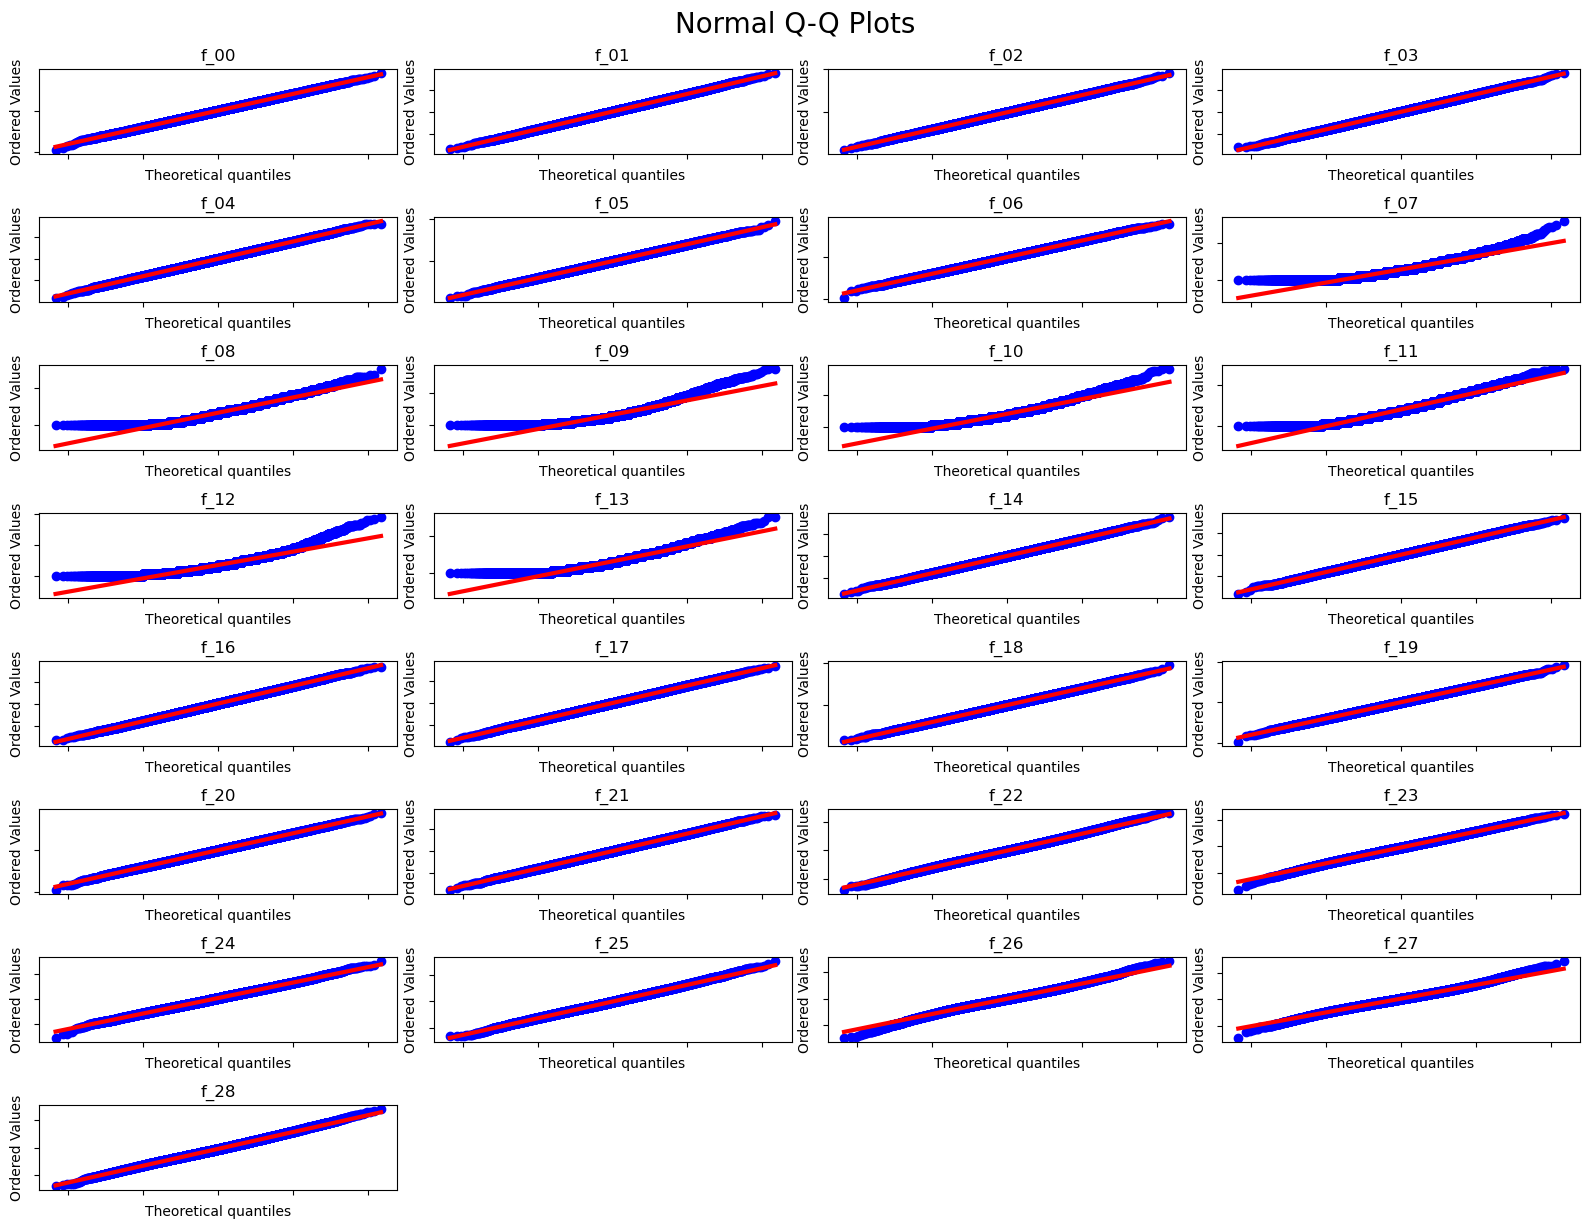

In [16]:
# Normal Q-Q plots
figure = plt.figure(figsize = (16,12))
num_cols = len(data_copy_cols_list)
num_rows = int(np.ceil(num_cols / 4))

for i in range(num_cols):
    
    # Q-Q plot
    ax = plt.subplot(num_rows, 4, i+1)
    stats.probplot(data.iloc[:,i], dist='norm', plot=plt)
    
    # Aesthetics
    ax.get_lines()[0].set_markersize(6.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(data.columns[i])
    
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Normal Q-Q Plots', y=1.02, fontsize=20)
plt.show()

### 3.8.2 Poisson Distributions Q-Q plots:

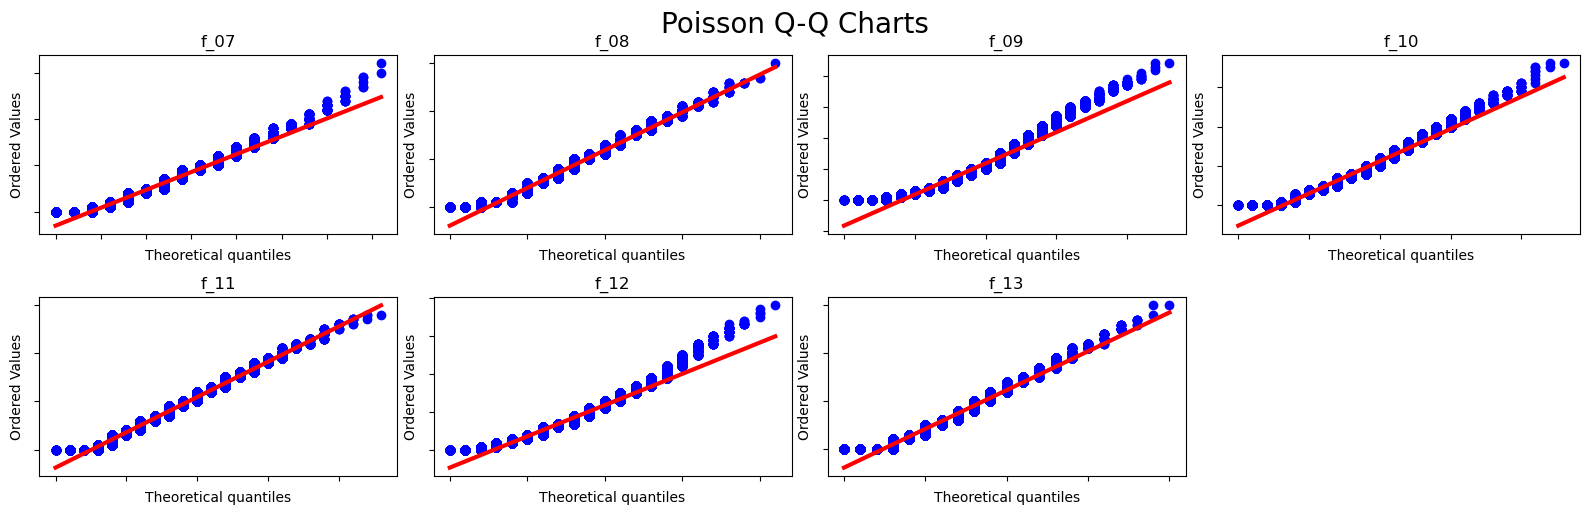

In [17]:
# Poisson Q-Q plots
figure = plt.figure(figsize = (16,5))
num_cols = len(int_data_cols)
num_rows = int(np.ceil(num_cols / 4))

for i, col in enumerate(int_data_cols):
    
    # Q-Q plot
    ax = plt.subplot(num_rows, 4, i+1)
    mu = data[col].mean()
    stats.probplot(data[col], dist='poisson', sparams=(mu,), plot=plt)
    
    # Aesthetics
    ax.get_lines()[0].set_markersize(6.0)
    ax.get_lines()[1].set_linewidth(3.0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title(col)
    
figure.tight_layout(h_pad=1.0, w_pad=0.5)
plt.suptitle('Poisson Q-Q Charts', y=1.02, fontsize=20)
plt.show()

### 3.8.3 Q-Q Plot Analysis Result:

- **Q-Q Plots for Normal Distribution:**
    - **Continuous Features:**<br>
        To visually assess the normality of the continuous features, Q-Q (Quantile-Quantile) plots were generated for each feature. Q-Q plots compare the quantiles of the sample data with the quantiles of the normal distribution.
        - **Features f_00 to f_06 and f_14 to f_21:**
            - The Q-Q plots for these features showed data points closely following the 45-degree line, indicating a good fit to a normal distribution.
            - This supports the result of the hypothesis tests which suggested that these features follow a normal distribution.
        - **Features f_22 to f_28:**
            - The Q-Q plots for these features revealed some deviations from the 45-degree line, particularly in the tails of the distribution.
            - Although these deviations suggest that the data may not perfectly follow a normal distribution, the overall pattern still appears reasonably close to a normal distribution.
    - **Discrete Features:**<br>
        Q-Q plots were also generated for the discrete features against the normal distribution:
        - **Features f_07 to f_13:**
            - The Q-Q plots for these features showed significant deviations from the 45-degree line.
            - This indicates that these discrete features do not follow a normal distribution, aligning with the hypothesis testing results.
- **Q-Q Plots for Poisson Distribution:**<br>
    To further assess the distribution of the discrete features, Q-Q plots were generated against a Poisson distribution:
    - **Discrete Features:**<br>
        - **Features f_07 to f_13:**
            - The Q-Q plots for the discrete features (f_07 to f_13) indicated that these features are not well-fit by a Poisson distribution.
            - However, some features showed closer alignment with the theoretical quantiles of a Poisson distribution, suggesting partial conformity.
<br> <br>

- **Summary of Observations from Q-Q Plots:**
    - ***Continuous Features (f_00 to f_06 and f_14 to f_21):*** Q-Q plots confirm these features are normally distributed.
    - ***Continuous Features (f_22 to f_28):*** Q-Q plots show deviations, yet they appear reasonably close to a normal distribution.
    - ***Discrete Features (f_07 to f_13):*** Q-Q plots demonstrate that these features do not follow a normal or Poisson distribution, though some features are close to a Poisson distribution.

# 4. Exploratory Data Analysis (EDA) Result:

After thorough analysis encompassing,

- Preliminary Data Exploration
- Discrete Features (Integer Columns) Distribution Analysis
- Continuous Features (Float Columns) Distribution Analysis
- KDE Plot Analysis
- Correlation Analysis
- Hypothesis Testing
- Q-Q Plot Analysis<br>

, the following conclusions have been drawn:

**Conclusion:**

- **Continuous Features (f_00 to f_06 and f_14 to f_21):** exhibit a clear adherence to normal distribution patterns.
- **Continuous Features (f_22 to f_28):** While not perfectly normal, they exhibit a noticeable proximity to a normal distribution.
- **Discrete Features (f_07 to f_13):** Although not strictly adhering to either a normal or Poisson distribution, they show notable resemblances to a Poisson distribution.

# 5. Future Plan of Action:

To further refine our analysis and prepare for clustering, the following steps will be undertaken:

- **Transform and Standardize Data:** Utilize transformation techniques to render the data more Gaussian-like, ensuring consistency in distribution across features and standardize to facilitate equal contribution to clustering algorithms.
- **Determine Optimal Number of Clusters:** Employ methods to find the appropriate number of clusters within the data.
- **Feature Selection:** Identify and select relevant features that contribute most significantly to cluster formation, streamlining the analysis process and enhancing interpretability.
- **Modelling:** Apply clustering algorithms to effectively cluster the standardized and transformed data.
- **Cluster Quality Analysis:** Evaluate the quality and coherence of clusters generated through metrics such as Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index etc. ensuring the robustness and reliability of the clustering solution.

By systematically executing these steps, we aim to derive meaningful insights from the data and construct well-defined clusters that accurately capture the underlying structure of the dataset.